# Building the Music Mood Dataset

### Music is a powerful tool that can reveal insights about a person's emotional state. In order to identify the general mood of a person depending on the song type they listen to, we will use user generated playlists to build our dataset. We will get several playlists for each of the 3 categories (Sad, Happy, Energetic) and label them. We will use the Spotipy Python Library which provides an interface to use the Spotify Web API to get the data.

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time
import seaborn as sns
import numpy as np
from termcolor import colored

### Initializing client_id and client_secret to create a SpotifyClientCredentials object to interact with the Spotify Web API

In [2]:
#Initializing client_id and client_secret
client_id = 'YOUR_CLIENT_ID'
client_secret = 'YOUR_CLIENT_SECRET'
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### Helper Functions and Structures to populate the music mood data

In [3]:
#Function to get track info given the id of an individual track
#The function returns a Data Frame with all the fields
def get_track_info(id, mood):
    meta = sp.track(id)
    #print(meta)
    track_title = meta['name']
    #print(track_title)
    album_name = meta['album']['name']
    #print(album_name)
    release_year = meta['album']['release_date']
    #print(release_year)
    song_length_ms = meta['duration_ms']
    #print(song_length_ms)
    popularity = meta['popularity']
    #print(popularity)
    artist = meta['album']['artists'][0]['name']
    features = sp.audio_features(id)
    #print(features)
    
    #Fetching Audio features of a track
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    valence = features[0]['valence']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    
    song_complete_features = [track_title, album_name, artist, release_year, song_length_ms,
                              popularity,danceability, acousticness, danceability, energy,
                              instrumentalness, liveness, loudness, speechiness, valence,
                              tempo, time_signature, mood]
    #print(song_complete_features)
    return pd.DataFrame([song_complete_features], columns = ['track_title', 'album_name', 'artist', 
                                                             'release_year', 'song_length_ms',
                              'popularity','danceability', 'acousticness', 'danceability', 'energy',
                              'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
                              'tempo', 'time_signature', 'Mood'])



In [4]:
#Make list of id's of tracks of each mood type
#For each list, get audio features and other info for each track (Append to tracks info list)
#Concat info from tracks info list to create a dataframe

#Stores ID's of all tracks (Happy Mood)
happy_songs_tracks_list = []
#Stores ID's of all tracks (Sad Mood)
sad_songs_tracks_list = []
#Stores ID's of all tracks (Energetic Mood)
energetic_songs_tracks_list = []

#Stores info about each track in the happy_songs_tracks_list
happy_songs_tracks_info_list = []
#Stores info about each track in the sad_songs_tracks_list
sad_songs_tracks_info_list = []
#Stores info about each track in the energetic_songs_tracks_list
energetic_songs_tracks_info_list = []

In [5]:
#function to fetch songs from a single playlist and add to the corresponding mood playlist
def populate_mood_playlist(playlist_url, tracks_list_name):
    #Fetching playlist data from the URL
    current_playlist = sp.playlist(playlist_url)
    #Fetching ID's of all tracks as ID's can be used to get audio features of a particular song
    for item in current_playlist['tracks']['items']:
        tracks_list_name.append(item['track']['id'])
    #print(tracks_list_name)

In [6]:
def track_features_from_url_list(url_list, tracks_list_name, tracks_info_list_name, mood):
    for song_url in url_list:
        populate_mood_playlist(song_url, tracks_list_name)
    for song_id in tracks_list_name:
        tracks_info_list_name.append(get_track_info(song_id, mood))
    songs_list_dataframe = pd.concat(tracks_info_list_name, ignore_index=True)
    return songs_list_dataframe

### Populating URL's for songs belonging to different moods. These playlists have been compiled by doing a basic Google Search. 

+ For eg: Happy Songs (Happy Songs Playlist, Very Happy Songs Spotify)
+ Energetic Songs (Upbeat Music Spotify Playlist , Energetic Songs Playlist)

In [7]:
#URL's of Playlists with Happy Songs
happy_songs_playlist_urls = ['https://open.spotify.com/playlist/1llkez7kiZtBeOw5UjFlJq', 
                             'https://open.spotify.com/playlist/1h90L3LP8kAJ7KGjCV2Xfd',
                             'https://open.spotify.com/playlist/37i9dQZF1DXdPec7aLTmlC',
                             'https://open.spotify.com/playlist/3Jsp2Nxq1vgtO8gTsoL1vp',
                             'https://open.spotify.com/playlist/37i9dQZF1DX9u7XXOp0l5L',
                             'https://open.spotify.com/playlist/37i9dQZF1DWZKuerrwoAGz',
                             'https://open.spotify.com/playlist/09fGvDzp3IvctCivKiLlKj',
                             'https://open.spotify.com/playlist/4AnAUkQNrLKlJCInZGSXRO']

#URL's of Playlists with Sad Songs
sad_songs_playlist_urls = ['https://open.spotify.com/playlist/37i9dQZF1DX7qK8ma5wgG1', 
                           'https://open.spotify.com/playlist/4WloBZWLuV80F07SCPxs09',
                           'https://open.spotify.com/playlist/7ABD15iASBIpPP5uJ5awvq',
                           'https://open.spotify.com/playlist/6XFfCL23a4TwyxuhEY2cXb',
                           'https://open.spotify.com/playlist/0zHkISuEcNr2Zav2X4TXCQ',
                           'https://open.spotify.com/playlist/78FHjijA1gBLuVx4qmcHq6',
                           'https://open.spotify.com/playlist/45DU72qlzzLgqStC4oYNY6',
                           'https://open.spotify.com/playlist/5cgJVFFgOrWxQzHYKwZM4Z',
                           'https://open.spotify.com/playlist/6gjfqhrh0NEonWbNmp6ucZ']

#URL's of Playlists with Energetic Songs
energetic_songs_playlist_urls = ['https://open.spotify.com/playlist/1QBqrGbqjA7aWCzc796iAr', 
                                 'https://open.spotify.com/playlist/67OXR8Aof6KcTml5ODC0XM',
                                 'https://open.spotify.com/playlist/0Vjhah37el0Aq5yoRaujBz',
                                 'https://open.spotify.com/playlist/3TLdUbYAxjVyf2DiOXpDHZ',
                                 'https://open.spotify.com/playlist/0lU86qLkSQVI991j4BUTDF',
                                 'https://open.spotify.com/playlist/0V32mTwWBzo6rNIk21owsY',
                                 'https://open.spotify.com/playlist/77zwIXYRjxuoO5jXFpeeWx',
                                 'https://open.spotify.com/playlist/3tpI8a2TeOypCgHu8fbXi7',
                                 'https://open.spotify.com/playlist/37i9dQZF1DWVhQ5d3I6DeF',
                                 'https://open.spotify.com/playlist/62Bjj7Wh0chXB6GM1VFF4U']

### Creating individual Data Frames for the 3 different moods (Happy, Sad, Energetic)

In [8]:
happy_songs_dataframe = track_features_from_url_list(happy_songs_playlist_urls,
                                                     happy_songs_tracks_list,
                                                     happy_songs_tracks_info_list,
                                                     'Happy')
happy_songs_dataframe

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Mood
0,Walking On Sunshine,Katrina & The Waves,Katrina & The Waves,1985,238733,80,0.596,0.01160,0.596,0.869,0.173000,0.0678,-11.970,0.0370,0.944,109.902,4,Happy
1,Shut Up and Dance,TALKING IS HARD,WALK THE MOON,2014-12-02,199080,83,0.578,0.00701,0.578,0.866,0.000000,0.2570,-3.804,0.0619,0.619,128.038,4,Happy
2,Oh Happy Day,Oh Happy Day: The Best Of The Edwin Hawkins Si...,The Edwin Hawkins Singers,2001-08-07,308600,52,0.321,0.09610,0.321,0.462,0.000000,0.1020,-10.711,0.0346,0.457,116.782,4,Happy
3,Good To Be Alive (Hallelujah),Magazines Or Novels (Deluxe Edition),Andy Grammer,2014-08-05,189869,0,0.784,0.03770,0.784,0.882,0.000000,0.6500,-3.646,0.0451,0.699,120.017,4,Happy
4,Best Day Of My Life,Best Day Of My Life,American Authors,2013-03-19,194000,0,0.672,0.05450,0.672,0.901,0.000285,0.0792,-2.415,0.0353,0.507,99.989,4,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,Lisztomania,Wolfgang Amadeus Phoenix,Phoenix,2009,241546,67,0.635,0.03490,0.635,0.786,0.007670,0.4970,-6.460,0.0377,0.305,97.540,4,Happy
729,Dancing in the Moonlight,Dancing In The Moonlight: The Best Of Toploader,Toploader,2009-04-22,233373,71,0.639,0.05280,0.639,0.845,0.000000,0.3360,-3.333,0.0372,0.871,119.480,4,Happy
730,LA Calling,Cave Rave,Crystal Fighters,2013-05-27,229243,0,0.574,0.06070,0.574,0.887,0.000002,0.3340,-6.172,0.0565,0.622,136.057,4,Happy
731,You Can't Hurry Love,"Hello, I Must Be Going",Phil Collins,1982-11-17,175346,0,0.639,0.06740,0.639,0.923,0.000000,0.0879,-5.708,0.0320,0.761,97.874,4,Happy


In [9]:
sad_songs_dataframe = track_features_from_url_list(sad_songs_playlist_urls,
                                                   sad_songs_tracks_list,
                                                   sad_songs_tracks_info_list,
                                                   'Sad')
sad_songs_dataframe

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Mood
0,Falling,Fine Line,Harry Styles,2019-12-13,240133,88,0.567,0.839000,0.567,0.267,0.000001,0.0890,-6.502,0.0299,0.0592,110.011,4,Sad
1,you broke me first,you broke me first,Tate McRae,2020-04-17,169265,92,0.667,0.785000,0.667,0.373,0.000000,0.0906,-9.389,0.0500,0.0823,124.148,4,Sad
2,Is It Just Me? (feat. JP Cooper),Is It Just Me?,Emily Burns,2020-12-04,203300,69,0.478,0.688000,0.478,0.339,0.000000,0.1040,-7.355,0.0544,0.2880,145.441,4,Sad
3,Train Wreck,Back from the Edge,James Arthur,2016-10-28,208826,88,0.311,0.701000,0.311,0.485,0.000000,0.0726,-5.726,0.0365,0.2250,77.355,4,Sad
4,IDK You Yet,IDK You Yet,Alexander 23,2020-04-09,184638,67,0.629,0.884000,0.629,0.306,0.077600,0.1240,-11.735,0.0424,0.1910,76.994,1,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,The Devil May Care (Mom & Dad Don't),Love EP,The Brian Jonestown Massacre,2009-08-03,340960,0,0.333,0.011000,0.333,0.328,0.276000,0.0860,-11.522,0.0391,0.2110,111.170,4,Sad
744,The Rat,Bows + Arrows,The Walkmen,2004-02-03,262226,58,0.167,0.000141,0.167,0.921,0.071600,0.2390,-4.881,0.0610,0.3150,168.225,4,Sad
745,"Seems So Long Ago, Nancy",Mojo Presents... Leonard Cohen,Leonard Cohen,2003-09-19,219786,0,0.364,0.927000,0.364,0.105,0.003670,0.1110,-16.160,0.0357,0.1520,134.626,3,Sad
746,Tired Eyes,Tonight's The Night,Neil Young,1975-06-20,273293,0,0.353,0.639000,0.353,0.162,0.000834,0.1260,-19.097,0.0343,0.1330,124.725,4,Sad


In [10]:
energetic_songs_dataframe = track_features_from_url_list(energetic_songs_playlist_urls,
                                                         energetic_songs_tracks_list,
                                                         energetic_songs_tracks_info_list,
                                                         'Energetic')
energetic_songs_dataframe

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Mood
0,BOSS,EVERYTHING IS LOVE,The Carters,2018-06-16,244133,54,0.813,0.18700,0.813,0.488,0.000132,0.2310,-7.737,0.2570,0.688,139.983,4,Energetic
1,Level Up,Level Up,Ciara,2018-07-18,204150,66,0.746,0.01420,0.746,0.825,0.010700,0.1210,-4.666,0.1690,0.584,152.914,4,Energetic
2,Crazy In Love (feat. Jay-Z),Dangerously In Love,Beyoncé,2003-06-24,236133,78,0.646,0.00249,0.646,0.770,0.000000,0.0715,-6.596,0.2260,0.681,99.165,4,Energetic
3,I Like It,Invasion of Privacy,Cardi B,2018-04-06,253390,84,0.816,0.09900,0.816,0.726,0.000000,0.3720,-3.998,0.1290,0.650,136.048,4,Energetic
4,Whatchamacallit (feat. Chris Brown),Ella Mai,Ella Mai,2018-10-12,179410,67,0.656,0.17000,0.656,0.616,0.000000,0.2190,-4.668,0.0392,0.269,98.871,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,Indestructible,Masterwork Indestructible,Ray Barretto,2009,256160,0,0.574,0.48700,0.574,0.600,0.000373,0.0602,-12.585,0.0582,0.837,109.189,4,Energetic
746,Mi Ritmo Es Bueno,Historia De La Salsa,Bobby Valentin,2009,344226,0,0.548,0.56000,0.548,0.705,0.000125,0.1290,-7.929,0.0911,0.869,96.576,4,Energetic
747,Quítate Tú,Anthology,Fania All Stars,2012-04-10,331720,0,0.751,0.51000,0.751,0.681,0.001550,0.9060,-5.255,0.0437,0.928,122.211,4,Energetic
748,Ponte Duro,The Very Best of Fania All Stars (The Original...,Fania All Stars,2013-12-24,552533,0,0.441,0.63700,0.441,0.953,0.934000,0.1210,-6.409,0.0743,0.805,130.669,4,Energetic


### Concatenating all individual playlists in a single Data Frame

In [11]:
all_songs_list = pd.concat([happy_songs_dataframe, sad_songs_dataframe, energetic_songs_dataframe],
                           ignore_index=True)
all_songs_list.to_csv('spotify_songs_by_mood.csv',index=False)
all_songs_list

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Mood
0,Walking On Sunshine,Katrina & The Waves,Katrina & The Waves,1985,238733,80,0.596,0.01160,0.596,0.869,0.173000,0.0678,-11.970,0.0370,0.944,109.902,4,Happy
1,Shut Up and Dance,TALKING IS HARD,WALK THE MOON,2014-12-02,199080,83,0.578,0.00701,0.578,0.866,0.000000,0.2570,-3.804,0.0619,0.619,128.038,4,Happy
2,Oh Happy Day,Oh Happy Day: The Best Of The Edwin Hawkins Si...,The Edwin Hawkins Singers,2001-08-07,308600,52,0.321,0.09610,0.321,0.462,0.000000,0.1020,-10.711,0.0346,0.457,116.782,4,Happy
3,Good To Be Alive (Hallelujah),Magazines Or Novels (Deluxe Edition),Andy Grammer,2014-08-05,189869,0,0.784,0.03770,0.784,0.882,0.000000,0.6500,-3.646,0.0451,0.699,120.017,4,Happy
4,Best Day Of My Life,Best Day Of My Life,American Authors,2013-03-19,194000,0,0.672,0.05450,0.672,0.901,0.000285,0.0792,-2.415,0.0353,0.507,99.989,4,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,Indestructible,Masterwork Indestructible,Ray Barretto,2009,256160,0,0.574,0.48700,0.574,0.600,0.000373,0.0602,-12.585,0.0582,0.837,109.189,4,Energetic
2227,Mi Ritmo Es Bueno,Historia De La Salsa,Bobby Valentin,2009,344226,0,0.548,0.56000,0.548,0.705,0.000125,0.1290,-7.929,0.0911,0.869,96.576,4,Energetic
2228,Quítate Tú,Anthology,Fania All Stars,2012-04-10,331720,0,0.751,0.51000,0.751,0.681,0.001550,0.9060,-5.255,0.0437,0.928,122.211,4,Energetic
2229,Ponte Duro,The Very Best of Fania All Stars (The Original...,Fania All Stars,2013-12-24,552533,0,0.441,0.63700,0.441,0.953,0.934000,0.1210,-6.409,0.0743,0.805,130.669,4,Energetic


In [12]:
#Drop duplicates
all_songs_list_1 = all_songs_list.copy().drop_duplicates(ignore_index = True)
all_songs_list_1.to_csv('spotify_songs_by_mood.csv',index=False)
all_songs_list_1

,track_title,album_name,artist,release_year,song_length_ms,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Mood
0,Walking On Sunshine,Katrina & The Waves,Katrina & The Waves,1985,238733,80,0.596,0.01160,0.596,0.869,0.173000,0.0678,-11.970,0.0370,0.944,109.902,4,Happy
1,Shut Up and Dance,TALKING IS HARD,WALK THE MOON,2014-12-02,199080,83,0.578,0.00701,0.578,0.866,0.000000,0.2570,-3.804,0.0619,0.619,128.038,4,Happy
2,Oh Happy Day,Oh Happy Day: The Best Of The Edwin Hawkins Si...,The Edwin Hawkins Singers,2001-08-07,308600,52,0.321,0.09610,0.321,0.462,0.000000,0.1020,-10.711,0.0346,0.457,116.782,4,Happy
3,Good To Be Alive (Hallelujah),Magazines Or Novels (Deluxe Edition),Andy Grammer,2014-08-05,189869,0,0.784,0.03770,0.784,0.882,0.000000,0.6500,-3.646,0.0451,0.699,120.017,4,Happy
4,Best Day Of My Life,Best Day Of My Life,American Authors,2013-03-19,194000,0,0.672,0.05450,0.672,0.901,0.000285,0.0792,-2.415,0.0353,0.507,99.989,4,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Indestructible,Masterwork Indestructible,Ray Barretto,2009,256160,0,0.574,0.48700,0.574,0.600,0.000373,0.0602,-12.585,0.0582,0.837,109.189,4,Energetic
2085,Mi Ritmo Es Bueno,Historia De La Salsa,Bobby Valentin,2009,344226,0,0.548,0.56000,0.548,0.705,0.000125,0.1290,-7.929,0.0911,0.869,96.576,4,Energetic
2086,Quítate Tú,Anthology,Fania All Stars,2012-04-10,331720,0,0.751,0.51000,0.751,0.681,0.001550,0.9060,-5.255,0.0437,0.928,122.211,4,Energetic
2087,Ponte Duro,The Very Best of Fania All Stars (The Original...,Fania All Stars,2013-12-24,552533,0,0.441,0.63700,0.441,0.953,0.934000,0.1210,-6.409,0.0743,0.805,130.669,4,Energetic


### Countplot to visualize the number of songs per mood

<AxesSubplot:xlabel='Mood', ylabel='count'>

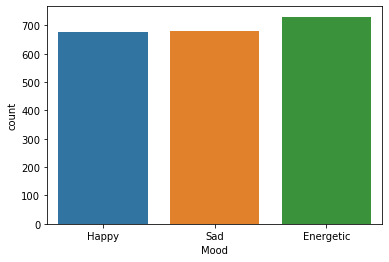

In [13]:
sns.countplot(x = all_songs_list_1['Mood'])